In [1]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import time

%matplotlib inline

In [2]:
# Read the data from csv file
col_names = []
for i in range(20):
    if i == 0:
        col_names.append('quality')
    if i == 1:
        col_names.append('prescreen')
    if i >= 2 and i <= 7:
        col_names.append('ma' + str(i))
    if i >= 8 and i <= 15:
        col_names.append('exudate' + str(i))
    if i == 16:
        col_names.append('euDist')
    if i == 17:
        col_names.append('diameter')
    if i == 18:
        col_names.append('amfm_class')
    if i == 19:
        col_names.append('label')

data = pd.read_csv("messidor_features.txt", names = col_names)
print(data.shape)
data.head(10)

(1151, 20)


,quality,prescreen,ma2,ma3,ma4,ma5,ma6,ma7,exudate8,exudate9,exudate10,exudate11,exudate12,exudate13,exudate14,exudate15,euDist,diameter,amfm_class,label
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
5,1,1,44,43,41,41,37,29,28.356400,6.935636,2.305771,0.323724,0.000000,0.000000,0.000000,0.000000,0.502831,0.126741,0,1
6,1,0,29,29,29,27,25,16,15.448398,9.113819,1.633493,0.000000,0.000000,0.000000,0.000000,0.000000,0.541743,0.139575,0,1
7,1,1,6,6,6,6,2,1,20.679649,9.497786,1.223660,0.150382,0.000000,0.000000,0.000000,0.000000,0.576318,0.071071,1,0
8,1,1,22,21,18,15,13,10,66.691933,23.545543,6.151117,0.496372,0.000000,0.000000,0.000000,0.000000,0.500073,0.116793,0,1
9,1,1,79,75,73,71,64,47,22.141784,10.054384,0.874633,0.099780,0.023386,0.000000,0.000000,0.000000,0.560959,0.109134,0,1


### 1. Data preprocessing  & dimensionality reduction with PCA

In [3]:
# Separate the feature columns from the class label column
data_Y = data['label']
data_X = data.drop(['label'], axis = 1)

print(data_Y.shape)
print(data_X.shape)

(1151,)
(1151, 19)


In [4]:
# Standardize the the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_X)

print()
print(type(X_scaled))
print(X_scaled.shape)

# Make sure data got stored directly
print()
print(X_scaled[0])
print("mean", X_scaled.mean())
print("variance", X_scaled.std())




<class 'numpy.ndarray'>
(1151, 19)

[ 0.05905386  0.2982129  -0.6414863  -0.61878225 -0.57646257 -0.63002889
 -0.55111605 -0.47374452 -0.24291735 -0.24600298 -0.29696618 -0.2715091
 -0.21832427 -0.19440942 -0.20512449 -0.18616904 -1.29476283 -0.46865568
  1.40504812]
mean -2.8876256637559514e-17
variance 1.0


Q3 . Split your dataset into training and test sets (80% - 20% split). Use `sklearn.model_selection.train_test_split` to help you in this task. You should be working with your standardized features from here forward. Display how many records are in the training set and how many are in the test set.

In [5]:
# Split data into a train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data_Y, test_size = 0.20, random_state = None)
print("X_train=",X_train.shape, " y_train=", y_train.shape)
print("X_test=",X_test.shape, " y_test=", y_test.shape)

X_train= (920, 19)  y_train= (920,)
X_test= (231, 19)  y_test= (231,)


In [6]:
# Fit PCA to training set
pca = PCA()
pca_data = pca.fit_transform(X_train)

pca_data_df = pd.DataFrame(pca_data)
pca_data_df.head()

pca = PCA(n_components=0.95, svd_solver='full')
X_train_pca = pca.fit_transform(X_train)
var_exp = pca.explained_variance_ratio_
print("Variance in each PC:", var_exp)

cum_var_exp = np.cumsum(var_exp)
print("Cumulative variance:", cum_var_exp)

# Transform the test set
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

print (X_train_pca.shape, X_test_pca.shape)


Variance in each PC: [0.32829699 0.26278884 0.10422956 0.06071516 0.05289956 0.05168454
 0.04293742 0.03777954 0.02630744]
Cumulative variance: [0.32829699 0.59108583 0.69531539 0.75603055 0.80893012 0.86061466
 0.90355209 0.94133163 0.96763906]
(920, 9) (231, 9)


### 2. Training Decision Trees in `scikit-learn`

[Text(167.4, 190.26, 'X[1] <= 1.564\nentropy = 0.998\nsamples = 920\nvalue = [434, 486]'),
 Text(83.7, 135.9, 'X[0] <= 2.449\nentropy = 1.0\nsamples = 834\nvalue = [424, 410]'),
 Text(41.85, 81.53999999999999, 'X[8] <= 0.089\nentropy = 0.987\nsamples = 666\nvalue = [377, 289]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.957\nsamples = 447\nvalue = [278, 169]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.993\nsamples = 219\nvalue = [99, 120]'),
 Text(125.55000000000001, 81.53999999999999, 'X[2] <= -0.422\nentropy = 0.855\nsamples = 168\nvalue = [47, 121]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.99\nsamples = 59\nvalue = [26, 33]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.707\nsamples = 109\nvalue = [21, 88]'),
 Text(251.10000000000002, 135.9, 'X[8] <= -0.055\nentropy = 0.519\nsamples = 86\nvalue = [10, 76]'),
 Text(209.25, 81.53999999999999, 'X[2] <= 0.122\nentropy = 0.845\nsamples = 33\nvalue = [9, 24]'),
 Text(188.32500000000002, 27.1800000000000

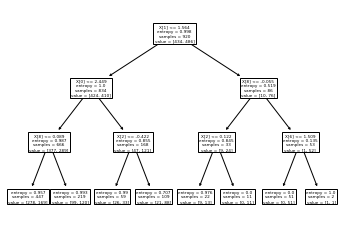

In [7]:
# Create a decision tree 
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
clf = clf.fit(X_train_pca, y_train)
tree.plot_tree(clf)

In [8]:
# Predict classes
pred_Y = clf.predict(X_test_pca)
print(pred_Y)

print(X_test)

# Print accuracy
print('Accuracy on test data is:', (accuracy_score(y_test, pred_Y)))


[1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0
 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1
 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0
 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0
 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1
 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0
 1 0 0 0 1 1 1 1 1]
[[ 0.05905386  0.2982129  -0.87577179 ...  0.35533627 -0.22307464
   1.40504812]
 [ 0.05905386  0.2982129   0.56898875 ... -0.02957037  0.16266321
  -0.7117194 ]
 [ 0.05905386  0.2982129   0.41279842 ... -1.19858966 -0.03965543
  -0.7117194 ]
 ...
 [ 0.05905386  0.2982129  -0.09482015 ... -0.8826838   0.41114328
  -0.7117194 ]
 [ 0.05905386  0.2982129  -0.13386773 ...  0.87211104 -0.52435045
  -0.7117194 ]
 [ 0.05905386 -3.35330894 -1.03196212 ... -1.44841882  0.83858251
  -0.7117194 ]]
Accuracy on test data is: 0.4588744588

### 3. Using K-fold Cross Validation


In [9]:
clf = tree.DecisionTreeClassifier()

# Run a 10-fold cross validation
scores = cross_val_score(clf, data_X, data_Y, cv=10) 
print("Scores:", scores)                                            

print("Accuracy:", scores.mean()*100)

Scores: [0.60344828 0.62608696 0.5826087  0.54782609 0.62608696 0.64347826
 0.63478261 0.56521739 0.62608696 0.59130435]
Accuracy: 60.46926536731634


In [10]:
clf = tree.DecisionTreeClassifier()

# Try max_depth values of 5, 10, 15, 20
params = {"max_depth": [5, 10, 15, 20], 
          "min_samples_leaf": [5, 10, 15, 20], 
          "max_features": [5, 10, 15]}


# Create the GridSearchCV object:
# Pass in our classifier (the decision tree), the parameters to test,5-fold cross validation
grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy')

# A 5-fold CV will be run for each max_depth and accuracy will be assesed for each max_depth
grid_search.fit(data_X, data_Y)

# Find best max_depth
print(grid_search.best_params_)
# Print accuracy for best max_depth?
print("Accuracy:", grid_search.best_score_*100)

{'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 15}
Accuracy: 64.98696785403996


In [11]:
# Perform the nested cross-validation
nested_score = cross_val_score(grid_search, data_X, data_Y, cv=3)

print("Accuracy:", nested_score.mean()*100)

/Users/piacadar/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Accuracy: 61.943129895561356
